In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [4]:
wine = load_wine()

In [5]:
features = pd.DataFrame(wine.data, columns = wine.feature_names)
target = pd.DataFrame(wine.target, columns = ['target'])

In [12]:
features = (features - features.min())/(features.max()-features.min())

In [14]:
x = np.array(features)
y = np.array(target)

In [15]:
y = y.ravel()

In [16]:
xtrain, xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3)

In [17]:
model  = Sequential([
    Dense(32, activation = "relu", input_shape=(xtrain[1].shape)),
    Dense(3, activation = "softmax")
])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [26]:
adam = keras.optimizers.adam(lr=0.001)

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = adam,
             metrics = ['accuracy'])

In [29]:
history = model.fit(xtrain, ytrain, epochs=10, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
124/124 [==============================] - 0s 3ms/step - loss: 1.0608 - acc: 0.6048
Epoch 2/10
124/124 [==============================] - 0s 65us/step - loss: 1.0302 - acc: 0.6048
Epoch 3/10
124/124 [==============================] - 0s 81us/step - loss: 1.0019 - acc: 0.6129
Epoch 4/10
124/124 [==============================] - 0s 73us/step - loss: 0.9773 - acc: 0.6048
Epoch 5/10
124/124 [==============================] - 0s 73us/step - loss: 0.9548 - acc: 0.5968
Epoch 6/10
124/124 [==============================] - 0s 81us/step - loss: 0.9367 - acc: 0.5968
Epoch 7/10
124/124 [==============================] - 0s 57us/step - loss: 0.9155 - acc: 0.6129
Epoch 8/10
124/124 [==============================] - 0s 65us/step - loss: 0.8975 - acc: 0.6452
Epoch 9/10
124/124 [==============================] - 0s 89us/step - loss: 0.8784 - acc: 0.6935
Epoch 10/10
124/124 [==============================] - 0s 65us/step - loss: 0.8605 - acc:

In [30]:
history.history

{'loss': [1.0607812981451712,
  1.030151790188205,
  1.0019336342811584,
  0.9772825068043124,
  0.9548281181243158,
  0.9367247992946256,
  0.9154550529295399,
  0.8975323054098314,
  0.8784457002916644,
  0.8604809584156159],
 'acc': [0.6048387067933236,
  0.6048387154456107,
  0.6129032200382601,
  0.6048387154456107,
  0.5967741906642914,
  0.5967741973938481,
  0.6129032229223559,
  0.6451612845543893,
  0.6935483909422352,
  0.7419354838709677]}

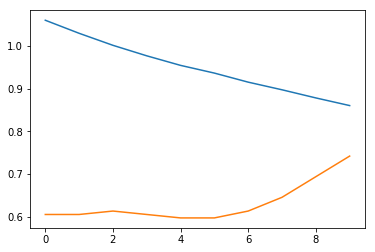

In [31]:
plt.plot(history.epoch, history.history['loss'],
        history.epoch, history.history['acc'])

In [33]:
history.history.keys()

dict_keys(['loss', 'acc'])